In [1]:
%load_ext autoreload
%autoreload 2
exec(open('init_notebook.py').read())
from matplotlib import pyplot as plt
from highD.HighD import HighD
from highD.Filter import Filter
from highD.Plot import Plot
from highD.Visualizer import GIF
from highD.helper import *

current working dirC:\Users\abjawad\Documents\GitHub\cogMod-driver-behavior-model\highd_tools


In [2]:

import os

def read_cogmod_files(file_names, COGMOD_LOGS):
    dfs = []
    for file_name in file_names:
        cogmod_file_path = os.path.join(COGMOD_LOGS, file_name)
        df = pd.read_csv(cogmod_file_path)
        dfs.append(df)
    return dfs

file_names = ["2023-05-28-18-42-01---0.csv",
              "2023-05-28-18-57-59---0.csv"]    
cogmod_dfs = read_cogmod_files(file_names, COGMOD_LOGS)
print(cogmod_dfs[0].columns)

print(cogmod_dfs[0]['exec_num'].unique())
grouped = cogmod_dfs[0].groupby('exec_num')

Index(['scenario_id', 'exec_num', 'frame', 'scenario_status', 'ego_id', 'c_x',
       'c_y', 'c_speed', 'c_acceleration', 'target_speed', 'c_steer',
       'c_throttle', 'c_brake', 'perceived_c_x', 'perceived_c_y',
       'perceived_c_speed', 'gaze_direction', 'preceding_id', 'a_x', 'a_y',
       'a_speed'],
      dtype='object')
[10  9  8  7  6  5  4  3  2  1  0]


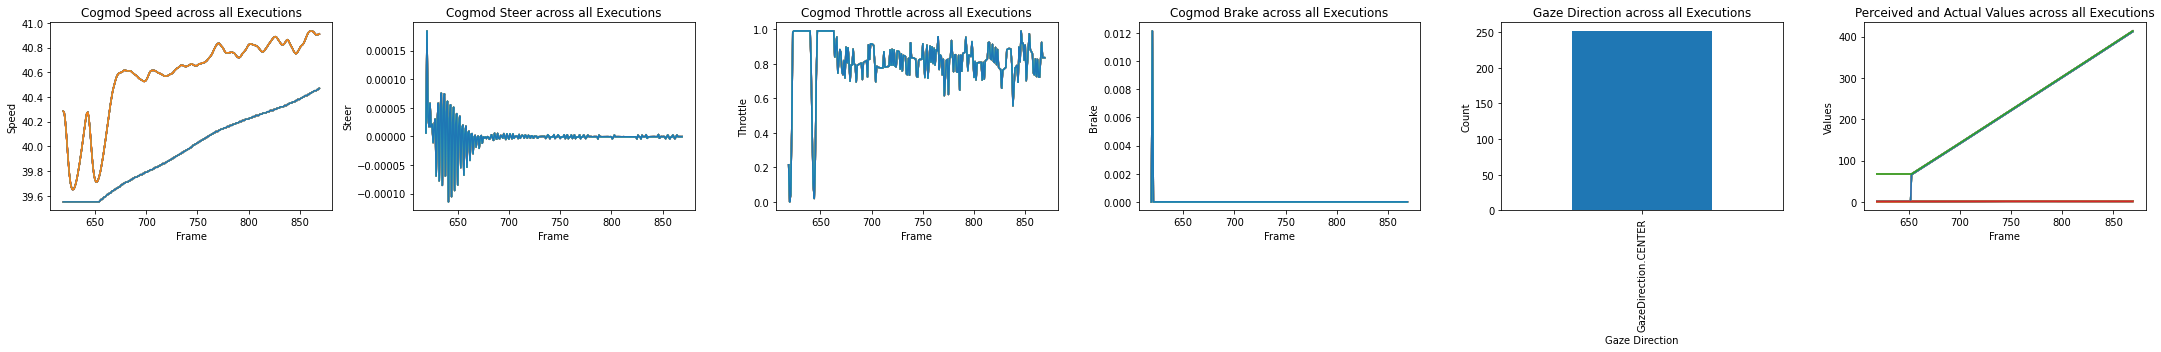

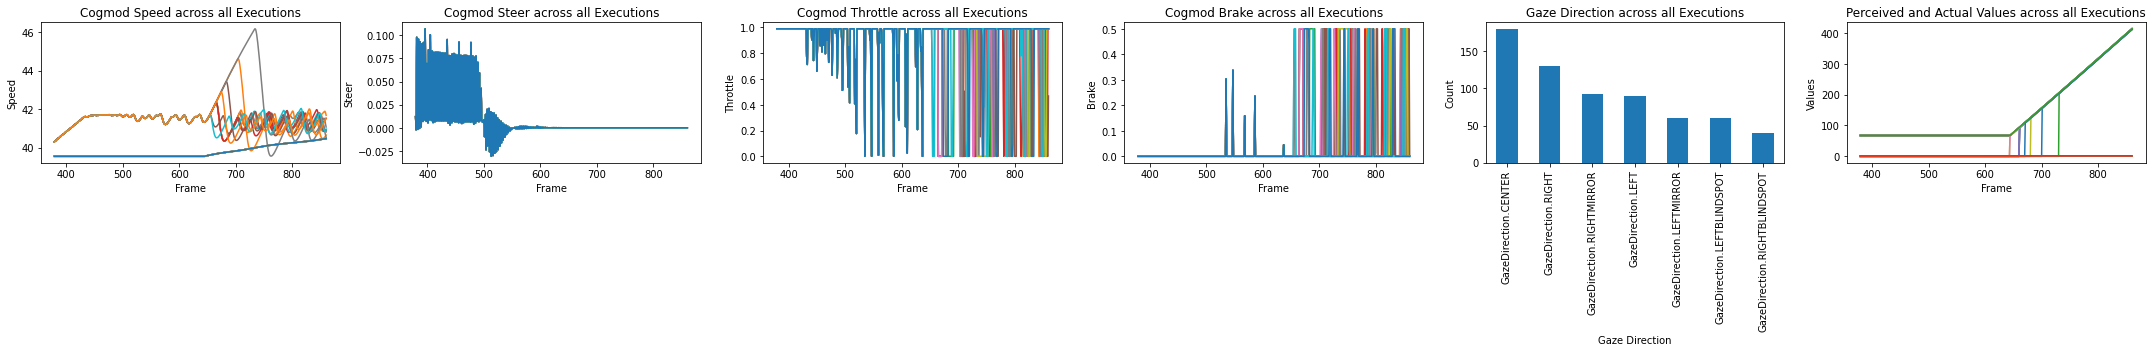

In [3]:
Plot.plot_all_exec_nums(cogmod_dfs[0])
Plot.plot_all_exec_nums(cogmod_dfs[-1])

In [4]:
ids = ["01", "02"]
highD = HighD(ids, DATA_DIRECTORY)

dataset_id = 1
_, tMeta, tracks = highD.get_dataframe_tuple(dataset_id)
df = highD.get_combined_dataframe(dataset_id)
image = highD.get_image(dataset_id)
df.columns

Loaded data and image for dataset 01.
Loaded data and image for dataset 02.


Index(['dataset_id', 'locationId', 'frame', 'id', 'class', 'drivingDirection',
       'laneId', 'x', 'y', 'width', 'height', 'xVelocity', 'yVelocity',
       'xAcceleration', 'yAcceleration', 'frontSightDistance',
       'backSightDistance', 'dhw', 'thw', 'ttc', 'precedingXVelocity',
       'precedingId', 'followingId', 'leftPrecedingId', 'leftAlongsideId',
       'leftFollowingId', 'rightPrecedingId', 'rightAlongsideId',
       'rightFollowingId'],
      dtype='object')

In [5]:
follow_meta = Filter.filter_vehicle_follow_scenario(df, 
                                      ego_type='Car', 
                                      preceding_type='Car',
                                      minDuration=5, 
                                      minStartDistance=50,
                                      maxStartDistance=100,
                                      removeStrictDistanceInc=True)

print(follow_meta.shape)
follow_meta.head()

Filtering vehicle follow scenario Car Car 5 50 100
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total scenario 10, filtered scenario 5, ratio 0.5
(5, 8)


,ego_id,preceding_id,start_frame,end_frame,duration,start_distance,max_distance,min_distance
2,50,47,994,1211,8.68,61.680066,61.850137,50.781906
3,386,380,7878,8100,8.88,99.580025,99.580025,51.590035
5,680,678,14277,14510,9.32,68.200188,81.370325,68.200188
6,976,974,21037,21263,9.04,53.295855,56.650961,53.295855
7,1041,1037,22357,22539,7.28,97.970590,101.894064,97.970590


In [6]:
scenario_id = 0
print('scenario id ', scenario_id)
scenario_follow_meta = follow_meta.iloc[scenario_id]
ego_id = int(scenario_follow_meta['ego_id'])
preceding_id = int(scenario_follow_meta['preceding_id'])
start_frame = int(scenario_follow_meta['start_frame'])
end_frame = int(scenario_follow_meta['end_frame'])
print(ego_id, preceding_id, start_frame, end_frame)
print('total frmae ', end_frame - start_frame)

scenario id  0
50 47 994 1211
total frmae  217


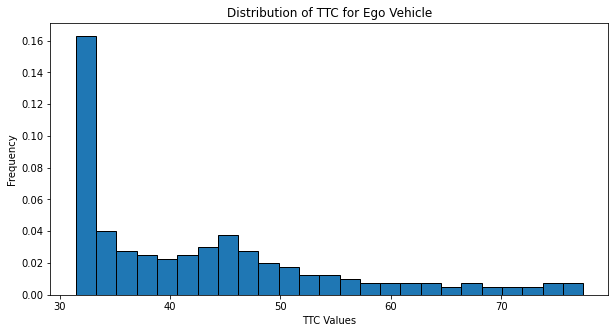

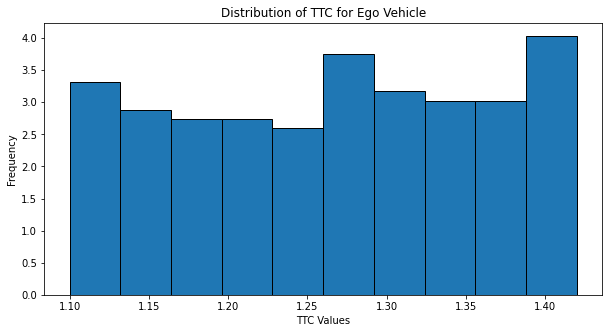

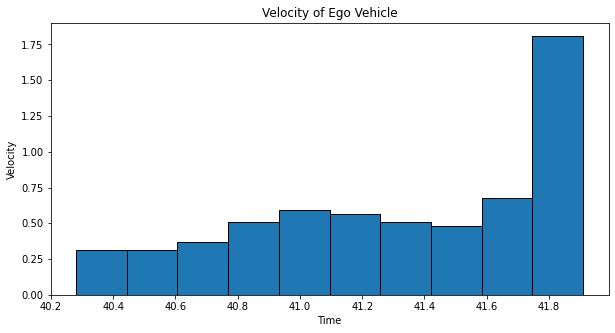

In [7]:

import numpy as np
import matplotlib.pyplot as plt

def plot_ttc(tracks, follow_meta, cMin, cMax):
    # Extract information about the scenario from the follow_meta dataframe
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    ttc_ego = ego_tracks['ttc'].values

    # Clip TTC values between cMin and cMax
    ttc_ego_clipped = np.clip(ttc_ego, cMin, cMax)

    # Normalize TTC values
    ttc_ego_norm = ttc_ego_clipped 

    # Create a plot
    plt.figure(figsize=(10, 5))

    # Plot TTC distribution
    ttc_ego_clipped = ttc_ego_clipped[ttc_ego_clipped != cMin]
    ttc_ego_clipped = ttc_ego_clipped[ttc_ego_clipped != cMax]
    plt.hist(ttc_ego_clipped, bins=25, edgecolor='black', density=True)
    plt.xlabel('TTC Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of TTC for Ego Vehicle')
    plt.show()


def plot_thw(tracks, follow_meta, cMin, cMax):
    # Extract information about the scenario from the follow_meta dataframe
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    thw_ego = ego_tracks['thw'].values

    # Clip TTC values between cMin and cMax
    thw_ego_clipped = np.clip(thw_ego, cMin, cMax)

    # Normalize TTC values
    ttc_ego_norm = thw_ego_clipped 

    # Create a plot
    plt.figure(figsize=(10, 5))

    # Plot TTC distribution
    thw_ego_clipped = thw_ego_clipped[thw_ego_clipped != cMin]
    thw_ego_clipped = thw_ego_clipped[thw_ego_clipped != cMax]
    plt.hist(thw_ego_clipped, bins=10, edgecolor='black', density=True)
    plt.xlabel('TTC Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of TTC for Ego Vehicle')
    plt.show()



def plot_velocity(tracks, follow_meta):
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']
    
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    velcoity_ego = (ego_tracks['xVelocity'] ** 2 + ego_tracks['yVelocity'] ** 2) ** 0.5
    
    plt.figure(figsize=(10, 5))
    plt.hist(velcoity_ego.values, bins=10,edgecolor='black', density=True)
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.title('Velocity of Ego Vehicle')
    plt.show()



plot_ttc(df, scenario_follow_meta, 0, 200)
plot_thw(df, scenario_follow_meta, -100, 200)

plot_velocity(df, scenario_follow_meta)

# TTC

best exec  10
type  <class 'numpy.ndarray'> (217,)
type  <class 'numpy.ndarray'> (218,)
type  <class 'numpy.ndarray'> (218,)


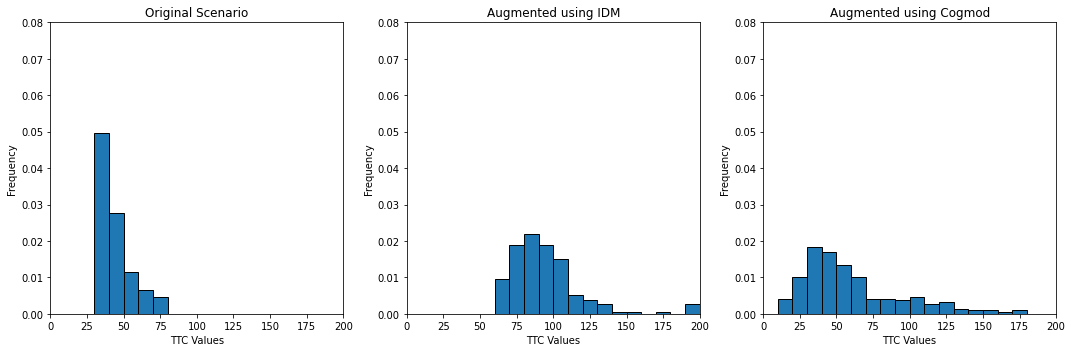

In [8]:

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def calculate_ttc_idm(df, cMin, cMax, exec_no=0):
    
    # Calculate distance between ego vehicle and preceding vehicle
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    # Calculate relative speed between ego vehicle and preceding vehicle
    relative_speed = df['c_speed'] - df['a_speed']

    # Avoid division by zero when calculating TTC
    relative_speed = np.where(relative_speed != 0, relative_speed, 1e-6)
    
    # Calculate TTC
    ttc = distance / relative_speed

    # add a new column named 'ttc' to the dataframe
    df['ttc'] = ttc
    
    # selecting only the relevant scene/frame
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    # selecting only the relevant execution
    df = df[df['exec_num'] == exec_no]

    return df

def calculate_ttc_cogmod(df, cMin, cMax):
    
    # Calculate distance between ego vehicle and preceding vehicle
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    # Calculate relative speed between ego vehicle and preceding vehicle
    relative_speed = df['c_speed'] - df['a_speed']

    # Avoid division by zero when calculating TTC
    relative_speed = np.where(relative_speed != 0, relative_speed, 1e-6)

    # Calculate TTC
    ttc = distance / relative_speed
    
    df['ttc'] = ttc
    
    # best exec is with lowest ttc
    best_exec = df[df['ttc'] == ttc.min()]['exec_num'].values[0]
    
    # selecting only the relevant scene/frame
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    print('best exec ', best_exec)
    # selecting only the relevant execution
    df = df[df['exec_num'] == best_exec]

    return df

def calculate_ttc(tracks, follow_meta, cMin, cMax):
    # Calculate distance between ego vehicle and preceding vehicle
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    ttc_ego = ego_tracks['ttc'].values
    
    ttc_ego = ttc_ego[ttc_ego < cMax]
    ttc_ego = ttc_ego[ttc_ego > cMin]
    
    return ttc_ego

def plot_ttc_combined(df, follow_meta, df1, df2, cmin, cmax, num_bins=20):
    # Calculate TTCs
    ttc_original = calculate_ttc(df, follow_meta, cmin, cmax)
    ttc_idm = calculate_ttc_idm(df1, cmin, cmax, exec_no=1)
    ttc_cogmod = calculate_ttc_cogmod(df2, cmin, cmax)
    
    ttc_idm = ttc_idm['ttc'].values
    ttc_cogmod = ttc_cogmod['ttc'].values
    
    print('type ', type(ttc_original), ttc_original.shape)
    print('type ', type(ttc_idm), ttc_idm.shape)
    print('type ', type(ttc_cogmod), ttc_cogmod.shape)
    # # Clip TTCs
    ttc_original_clipped = np.clip(ttc_original, cmin, cmax)
    ttc_idm_clipped = np.clip(ttc_idm, cmin, cmax)
    ttc_cogmod_clipped = np.clip(ttc_cogmod, cmin, cmax)
    
    # Calculate maximum x-value for TTCs
    max_ttc = cmax

    # Calculate bin edges based on maximum value
    bin_edges = np.linspace(0, max_ttc, num_bins+1)

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot original scenario
    axs[0].hist(ttc_original_clipped, bins=bin_edges, edgecolor='black', density=True)
    axs[0].set_xlim([0, max_ttc])
    axs[0].set_ylim([0, 0.08])  # Set desired y-axis limits
    axs[0].set_xlabel('TTC Values')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Original Scenario')

    # Plot scenario augmented with IDM
    axs[1].hist(ttc_idm_clipped, bins=bin_edges, edgecolor='black', density=True)
    axs[1].set_xlim([0, max_ttc])
    axs[1].set_ylim([0, 0.08])  # Set desired y-axis limits
    axs[1].set_xlabel('TTC Values')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Augmented using IDM')

    # Plot scenario augmented with Cogmod
    axs[2].hist(ttc_cogmod_clipped, bins=bin_edges, edgecolor='black', density=True)
    axs[2].set_xlim([0, max_ttc])
    axs[2].set_ylim([0, 0.08])  # Set desired y-axis limits
    axs[2].set_xlabel('TTC Values')
    axs[2].set_ylabel('Frequency')
    axs[2].set_title('Augmented using Cogmod')

    plt.tight_layout()
    plt.show()

# Call the function with appropriate parameters
plot_ttc_combined(df, scenario_follow_meta, cogmod_dfs[0], cogmod_dfs[1], 0, 200, num_bins=20)


best exec  8
type  <class 'numpy.ndarray'> (217,)
type  <class 'pandas.core.frame.DataFrame'> (218, 24)
type  <class 'pandas.core.frame.DataFrame'> (218, 24)


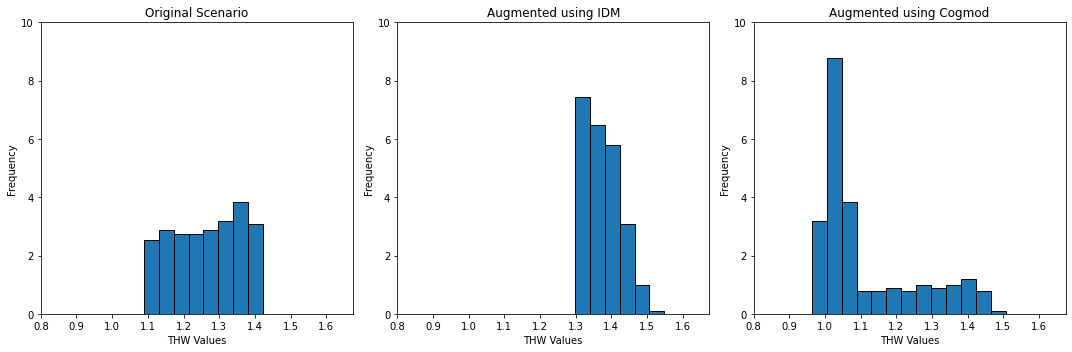

In [20]:


def calculate_thw_idm(df, cMin, cMax, exec_no=0):
    
    # df = df[df['scenario_status'] != 'ScenarioState.PENDING']
    # Calculate distance between ego vehicle and preceding vehicle
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    # time cogmod vehicle requires to reach the preceding vehicle at current speed
    # current speed, V; distance to preceding vehicle, d; time, t = d/V
    # Calculate relative speed between ego vehicle and preceding vehicle
    thw = distance / df['c_speed']
    
    df['thw'] = thw
    
    # selecting only the relevant scene/frame
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    # selecting only the relevant execution
    df = df[df['exec_num'] == exec_no]
    
    return df


def calculate_thw_cogmod(df, cMin, cMax):
    
    # df = df[df['scenario_status'] != 'ScenarioState.PENDING']
    # Calculate distance between ego vehicle and preceding vehicle
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    # time cogmod vehicle requires to reach the preceding vehicle at current speed
    # current speed, V; distance to preceding vehicle, d; time, t = d/V
    # Calculate relative speed between ego vehicle and preceding vehicle
    thw = distance / df['c_speed']
    
    df['thw'] = thw
    
    # selecting only the relevant scene/frame
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    best_exec = df[df['thw'] == thw.min()]['exec_num'].values[0]
    print('best exec ', best_exec)
    # selecting only the relevant execution
    df = df[df['exec_num'] == best_exec]
    
    return df

def calculate_thw(tracks, follow_meta, cMin, cMax):
    # Calculate distance between ego vehicle and preceding vehicle
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    thw_ego = ego_tracks['thw'].values
    
    thw_ego = thw_ego[thw_ego < cMax]
    thw_ego = thw_ego[thw_ego > cMin]
    
    return thw_ego

    

def plot_thw_combined(df, follow_meta, df1, df2, cmin, cmax, num_bins=20):
    # Calculate THWs
    thw_original = calculate_thw(df, follow_meta, cmin, cmax)
    thw_idm = calculate_thw_idm(df1, cmin, cmax, 0)
    thw_cogmod = calculate_thw_cogmod(df2, cmin, cmax)
    
    print('type ', type(thw_original), thw_original.shape)
    print('type ', type(thw_idm), thw_idm.shape)
    print('type ', type(thw_cogmod), thw_cogmod.shape)
    
    max_thw = max(max(thw_original), max(thw_idm['thw']), max(thw_cogmod['thw']))
    max_thw = max_thw + 0.1*max_thw
    
    bin_edges = np.linspace(0, max_thw, num_bins+1)
    # # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # # Plot original scenario
    axs[0].hist(thw_original, bins=bin_edges, edgecolor='black', density=True)
    axs[0].set_xlim([0.8, max_thw])
    axs[0].set_ylim([0, 10])  # Set desired y-axis limits
    axs[0].set_xlabel('THW Values')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Original Scenario')

    # Plot scenario augmented with IDM
    axs[1].hist(thw_idm['thw'], bins=bin_edges, edgecolor='black', density=True)
    axs[1].set_xlim([0.8, max_thw])
    axs[1].set_ylim([0, 10])  # Set desired y-axis limits
    axs[1].set_xlabel('THW Values')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Augmented using IDM')

    # Plot scenario augmented with Cogmod
    axs[2].hist(thw_cogmod['thw'], bins=bin_edges, edgecolor='black', density=True)
    axs[2].set_xlim([0.8, max_thw])
    axs[2].set_ylim([0, 10])  # Set desired y-axis limits
    axs[2].set_xlabel('THW Values')
    axs[2].set_ylabel('Frequency')
    axs[2].set_title('Augmented using Cogmod')

    plt.tight_layout()
    plt.show()

# Call the function with appropriate parameters
plot_thw_combined(df, scenario_follow_meta, cogmod_dfs[0], cogmod_dfs[1], 0, 200, num_bins=40)

# Velocity

type  <class 'pandas.core.series.Series'> (217,)
type  <class 'pandas.core.frame.DataFrame'> (218, 24)
type  <class 'pandas.core.frame.DataFrame'> (218, 24)


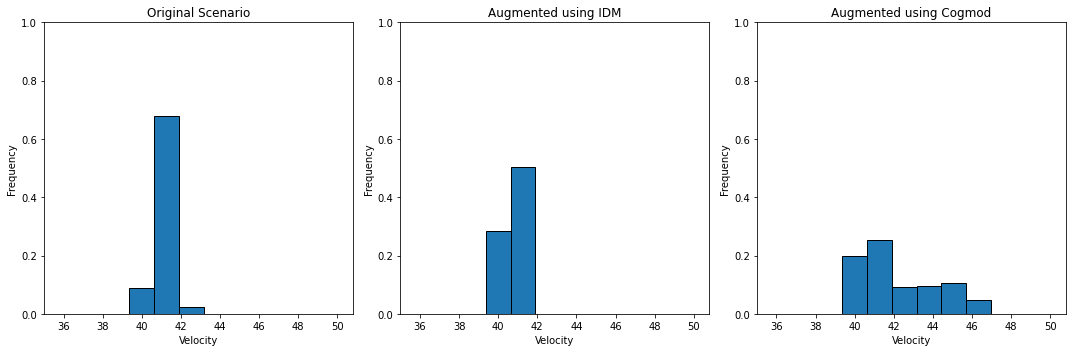

In [11]:
def calculate_vel_idm(df, exec_no=0):
    velocity = df['c_speed']
    df['velocity'] = velocity
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    df = df[df['exec_num'] == exec_no]
    
    return df

def calculate_vel_cogmod(df):
    velocity = df['c_speed']
    df['velocity'] = velocity
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    best_exec = df[df['velocity'] == velocity.max()]['exec_num'].values[0]
    df = df[df['exec_num'] == best_exec]
    return df

def calculate_vel(tracks, follow_meta):
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']
    
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    velcoity_ego = (ego_tracks['xVelocity'] ** 2 + ego_tracks['yVelocity'] ** 2) ** 0.5
    
    return velcoity_ego



def plot_velocity_combined(df, follow_meta, df1, df2, num_bins=20):
    # Calculate velocities
    velocity_original = calculate_vel(df, follow_meta)
    velocity_idm = calculate_vel_idm(df1, 0)
    velocity_cogmod = calculate_vel_cogmod(df2)
    
    print('type ', type(velocity_original), velocity_original.shape)
    print('type ', type(velocity_idm), velocity_idm.shape)
    print('type ', type(velocity_cogmod), velocity_cogmod.shape)
    
    max_velocity = max(max(velocity_original), max(velocity_idm['velocity']), max(velocity_cogmod['velocity']))
    max_velocity = max_velocity + 0.1*max_velocity
    
    bin_edges = np.linspace(0, max_velocity, num_bins+1)
    # bin_edges = 5
    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot original scenario velocities
    axs[0].hist(velocity_original, bins=bin_edges, edgecolor='black', density=True)
    axs[0].set_xlim([35, max_velocity])
    axs[0].set_ylim([0, 1])  # Set desired y-axis limits
    axs[0].set_xlabel('Velocity')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Original Scenario')

    # Plot scenario augmented with IDM velocities
    axs[1].hist(velocity_idm['velocity'], bins=bin_edges, edgecolor='black', density=True)
    axs[1].set_xlim([35, max_velocity])
    axs[1].set_ylim([0, 1])  # Set desired y-axis limits
    axs[1].set_xlabel('Velocity')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Augmented using IDM')

    # Plot scenario augmented with Cogmod velocities
    axs[2].hist(velocity_cogmod['velocity'], bins=bin_edges, edgecolor='black', density=True)
    axs[2].set_xlim([35, max_velocity])
    axs[2].set_ylim([0, 1])  # Set desired y-axis limits
    axs[2].set_xlabel('Velocity')
    axs[2].set_ylabel('Frequency')
    axs[2].set_title('Augmented using Cogmod')

    plt.tight_layout()
    plt.show()

# Call the function with appropriate parameters
plot_velocity_combined(df, scenario_follow_meta, cogmod_dfs[0], cogmod_dfs[1], num_bins=40)


best exec  10
best exec  8
vel shape  (217,) (218, 24) (218, 24)
ttc shape  (217,) (218, 24) (218, 24)
thw shape  (217,) (218, 24) (218, 24)


Text(0, 0.5, 'Density')

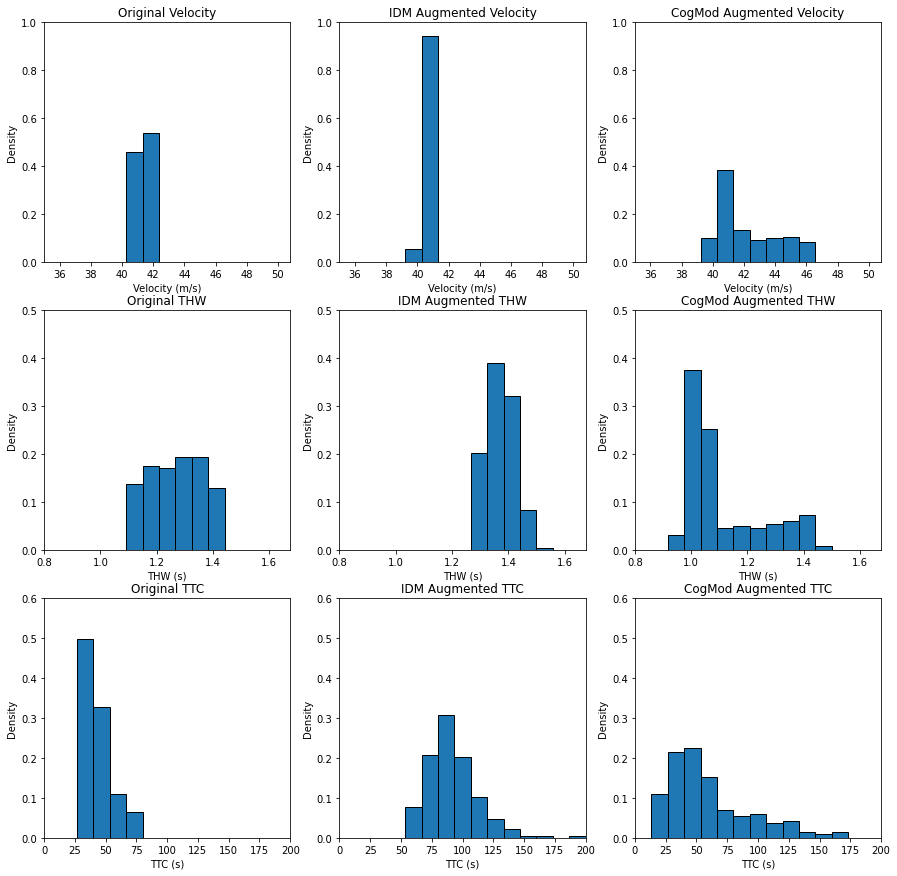

In [83]:
import matplotlib.pyplot as plt

num_bins = 15
# Load or calculate your data
original_velocity = calculate_vel(df, scenario_follow_meta)
original_ttc = calculate_ttc(df, scenario_follow_meta, 0, 200)
original_thw = calculate_thw(df, scenario_follow_meta, 0, 200)

# Perform IDM and COgmod augmentations
idm_velocity = calculate_vel_idm(cogmod_dfs[0], 0)
cogmod_velocity = calculate_vel_cogmod(cogmod_dfs[1])

idm_ttc = calculate_ttc_idm(cogmod_dfs[0], 0, 200, exec_no=1)
cogmod_ttc = calculate_ttc_cogmod(cogmod_dfs[1], 0, 200)

idm_thw = calculate_thw_idm(cogmod_dfs[0], 0, 200, exec_no=1)
cogmod_thw = calculate_thw_cogmod(cogmod_dfs[1], 0, 200)

print("vel shape ", original_velocity.shape, idm_velocity.shape, cogmod_velocity.shape)
print("ttc shape ", original_ttc.shape, idm_ttc.shape, cogmod_ttc.shape)
print("thw shape ", original_thw.shape, idm_thw.shape, cogmod_thw.shape)

max_velocity = max(max(original_velocity), max(idm_velocity['velocity']), max(cogmod_velocity['velocity']))
max_velocity = max_velocity + 0.1*max_velocity
vel_bin_edges = np.linspace(35, max_velocity, num_bins+1)

max_thw = max(max(original_thw), max(idm_thw['thw']), max(cogmod_thw['thw']))
max_thw = max_thw + 0.1*max_thw
thw_bin_edges = np.linspace(0.8, max_thw, num_bins+1)

max_ttc = 200
ttc_bin_edges = np.linspace(0, max_ttc, num_bins+1)



# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plotting velocity
axs[0, 0].hist(original_velocity, weights=np.ones(len(original_velocity))/len(original_velocity), bins=vel_bin_edges, edgecolor='black')
axs[0, 0].set_title('Original Velocity')
axs[0, 0].set_xlim([35, max_velocity])
axs[0, 0].set_ylim([0, 1])
axs[0, 0].set_xlabel('Velocity (m/s)')
axs[0, 0].set_ylabel('Density')

axs[0, 1].hist(idm_velocity['velocity'], weights=np.ones(len(idm_velocity['velocity']))/len(idm_velocity['velocity']), bins=vel_bin_edges, edgecolor='black')
axs[0, 1].set_title('IDM Augmented Velocity')
axs[0, 1].set_xlim([35, max_velocity])
axs[0, 1].set_ylim([0, 1])
axs[0, 1].set_xlabel('Velocity (m/s)')
axs[0, 1].set_ylabel('Density')

axs[0, 2].hist(cogmod_velocity['velocity'], weights=np.ones(len(cogmod_velocity['velocity']))/len(cogmod_velocity['velocity']), bins=vel_bin_edges, edgecolor='black')
axs[0, 2].set_title('CogMod Augmented Velocity')
axs[0, 2].set_xlim([35, max_velocity])
axs[0, 2].set_ylim([0, 1])
axs[0, 2].set_xlabel('Velocity (m/s)')
axs[0, 2].set_ylabel('Density')


axs[1, 0].hist(original_thw, weights=np.ones(len(original_thw))/len(original_thw), bins=thw_bin_edges, edgecolor='black')
axs[1, 0].set_title('Original THW')
axs[1, 0].set_xlim([0.8, max_thw])
axs[1, 0].set_ylim([0, 0.5])
axs[1, 0].set_xlabel('THW (s)')
axs[1, 0].set_ylabel('Density')

axs[1, 1].hist(idm_thw['thw'], weights=np.ones(len(idm_thw['thw']))/len(idm_thw['thw']), bins=thw_bin_edges, edgecolor='black')
axs[1, 1].set_title('IDM Augmented THW')
axs[1, 1].set_xlim([0.8, max_thw])
axs[1, 1].set_ylim([0, 0.5])
axs[1, 1].set_xlabel('THW (s)')
axs[1, 1].set_ylabel('Density')

axs[1, 2].hist(cogmod_thw['thw'], weights=np.ones(len(cogmod_thw['thw']))/len(cogmod_thw['thw']), bins=thw_bin_edges, edgecolor='black')
axs[1, 2].set_title('CogMod Augmented THW')
axs[1, 2].set_xlim([0.8, max_thw])
axs[1, 2].set_ylim([0, 0.5])
axs[1, 2].set_xlabel('THW (s)')
axs[1, 2].set_ylabel('Density')


axs[2, 0].hist(original_ttc, weights=np.ones(len(original_ttc))/len(original_ttc), bins=ttc_bin_edges, edgecolor='black')
axs[2, 0].set_title('Original TTC')
axs[2, 0].set_xlim([0, max_ttc])
axs[2, 0].set_ylim([0, 0.6])
axs[2, 0].set_xlabel('TTC (s)')
axs[2, 0].set_ylabel('Density')

axs[2, 1].hist(idm_ttc['ttc'], weights=np.ones(len(idm_ttc['ttc']))/len(idm_ttc['ttc']), bins=ttc_bin_edges, edgecolor='black')
axs[2, 1].set_title('IDM Augmented TTC')
axs[2, 1].set_xlim([0, max_ttc])
axs[2, 1].set_ylim([0, 0.6])
axs[2, 1].set_xlabel('TTC (s)')
axs[2, 1].set_ylabel('Density')

axs[2, 2].hist(cogmod_ttc['ttc'], weights=np.ones(len(cogmod_ttc['ttc']))/len(cogmod_ttc['ttc']), bins=ttc_bin_edges, edgecolor='black')
axs[2, 2].set_title('CogMod Augmented TTC')
axs[2, 2].set_xlim([0, max_ttc])
axs[2, 2].set_ylim([0, 0.6])
axs[2, 2].set_xlabel('TTC (s)')
axs[2, 2].set_ylabel('Density')




In [ ]:

# def calculate_drac(tracks, follow_meta, cMin, cMax):
#     # Calculate distance between ego vehicle and preceding vehicle
#     ego_id = follow_meta['ego_id']
#     preceding_id = follow_meta['preceding_id']
#     start_frame = follow_meta['start_frame']
#     end_frame = follow_meta['end_frame']

#     ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    
#     return ego_tracks

# def plot_drac(tracks, follow_meta):
    
#     ego_id = follow_meta['ego_id']
#     preceding_id = follow_meta['preceding_id']
#     start_frame = follow_meta['start_frame']
#     end_frame = follow_meta['end_frame']

#     # Get the relevant tracks for the scenario
#     ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
#     preceding_tracks = tracks.loc[(tracks['id'] == preceding_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    
#     print(ego_tracks.shape)
#     print(preceding_tracks.shape)
#     print(ego_tracks.columns)
    
#     ego_v = (ego_tracks['xVelocity'] ** 2 + ego_tracks['yVelocity'] ** 2) ** 0.5
    
#     print("ego_v", ego_v.shape)
    
#     preceding_v = (preceding_tracks['xVelocity'] ** 2 + preceding_tracks['yVelocity'] ** 2) ** 0.5
#     print("preceding_v", preceding_v.shape)
    
#     distance = ((ego_tracks['x'].values - preceding_tracks['x'].values) ** 2 + (ego_tracks['y'].values - preceding_tracks['y'].values) ** 2) ** 0.5

#     drac = (ego_v - preceding_v) ** 2 / distance
    
#     print(drac.shape)
    
#     plt.figure(figsize=(10, 5))

    
#     plt.hist(drac, bins=10, edgecolor='black', density=True)
#     plt.xlabel('TTC Values')
#     plt.ylabel('Frequency')
#     plt.title('Distribution of TTC for Ego Vehicle')
#     plt.show()
    
#     pass




#  nCarFollow 256, filter criteria {'thw_lower_bound': 0, 'thw_upper_bound': 4, 'time_duration': 5, 'distance_threshold': 50}

# def calculate_and_plot_ttc_all(df1, df2, df3=None):
    #     dfs = [df1, df2]

#     fig, axes = plt.subplots(nrows=1, ncols=len(dfs), figsize=(10 * len(dfs), 5))

#     for i, df in enumerate(dfs):
#         exec_nums = df['exec_num'].unique()
#         ttc_all = []
#         for exec_num in exec_nums:
#             df_group = df[df['exec_num'] == exec_num]
#             ttc = calculate_ttc(df_group)
#             ttc_all.extend(ttc.tolist())

#         # Plot the distribution of all TTC values
#         axes[i].hist(ttc_all, bins=20, edgecolor='black', density=True)
#         axes[i].set_xlim([0, None])
#         axes[i].set_xlabel('TTC Values')
#         axes[i].set_ylabel('Frequency')
#         axes[i].set_title(f'Distribution of TTC for DataFrame {i+1}')

#     plt.tight_layout()
#     plt.show()

# calculate_and_plot_ttc_all(cogmod_dfs[0], cogmod_dfs[1])